In [0]:
# !pip list | grep -e fastai -e torch -e torchvision

In [0]:
# !pip install PyDrive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# download = drive.CreateFile({'id': '1TCjHoe5S_rWpQzxBu8o07YI_zGZ708ma'})
# download.GetContentFile('Data.zip')

In [0]:
# from zipfile import ZipFile
# file_name="Data.zip"
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('done')

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy
from random import seed
from fastai.widgets import *

In [0]:
import numpy as np
import re
import pickle
import os
import glob
import pandas as pd
import cv2
from PIL import Image
from pathlib import Path
import fastai
from fastai.vision import *
from fastai.vision.models import *
import torch

In [0]:
from PIL import Image
import numpy as np
import os
from random import shuffle,seed
import matplotlib.pyplot as plt

In [0]:
torch.manual_seed(50)
np.random.seed(20) 

# Data Cleaning(Do not run again)

In [0]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=30, 
                      max_zoom=0.5, 
                      max_lighting=0.2)
path = path = '/content/drive/My Drive/C1_CD/'
data = ImageDataBunch.from_folder(path, test='/content/drive/My Drive/C1_CD/test', ds_tfms=tfms, size=224).normalize(imagenet_stats)

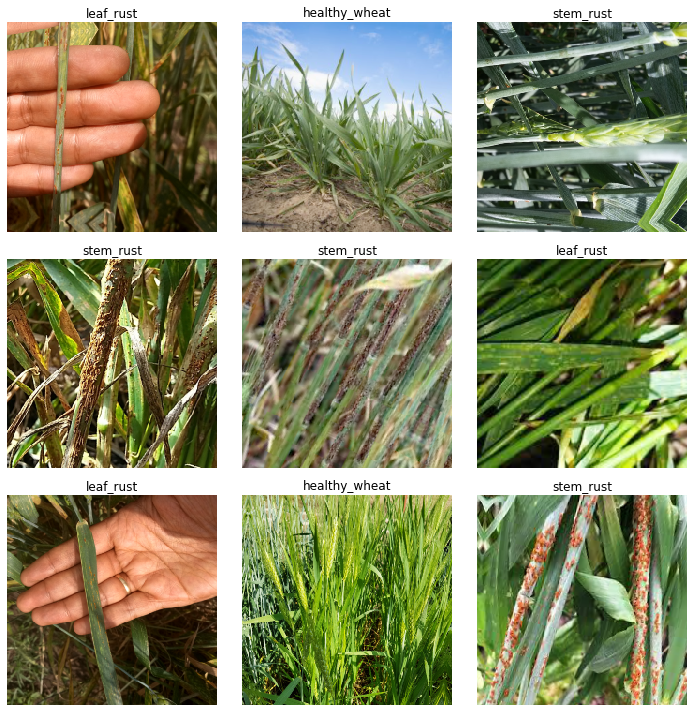

In [0]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])
learn.fit_one_cycle(1, 1e-3)
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-4,1e-2))

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn,n_imgs=200)

In [0]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

# Run from here

# Data loading and augmentation

In [0]:
path = '/content/drive/My Drive/C1_CD2/'

In [0]:
train_df = pd.read_csv(path+'cleaned.csv', header='infer')

In [0]:
train_df=train_df.dropna()

In [0]:
train_df

,name,label
1,train/healthy_wheat/03TD19.jpg,healthy_wheat
3,train/healthy_wheat/0LBIWV.jpg,healthy_wheat
5,train/healthy_wheat/0O5BON.jpg,healthy_wheat
7,train/healthy_wheat/0PFX47.jpg,healthy_wheat
9,train/healthy_wheat/1LNMUQ.jpg,healthy_wheat
...,...,...
1675,train/stem_rust/Z474SF.jpg,stem_rust
1677,train/stem_rust/ZCBE0P.jpg,stem_rust
1679,train/stem_rust/ZF5LOB.jpg,stem_rust
1681,train/stem_rust/ZGFMHX.JPG,stem_rust


In [0]:
tfms = get_transforms(do_flip=True, 
                      flip_vert=False, 
                      max_rotate=30, 
                      max_zoom=0.5, 
                      max_lighting=0.2)


In [0]:
clean_data_small = (ImageDataBunch.from_df(path, train_df,
                                     valid_pct=0.1,
                                     ds_tfms=tfms,
                                     size=128)
              .normalize(imagenet_stats))

In [0]:
clean_data_small

ImageDataBunch;

Train: LabelList (758 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat
Path: /content/drive/My Drive/C1_CD2;

Valid: LabelList (84 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
leaf_rust,healthy_wheat,stem_rust,leaf_rust,leaf_rust
Path: /content/drive/My Drive/C1_CD2;

Test: None

In [0]:
clean_data_large = (ImageDataBunch.from_df(path, train_df, 
                                     valid_pct=0,
                                     ds_tfms=tfms,
                                     size=256)
              .normalize(imagenet_stats))

In [0]:
clean_data_large

ImageDataBunch;

Train: LabelList (842 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat
Path: /content/drive/My Drive/C1_CD2;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/drive/My Drive/C1_CD2;

Test: None

In [0]:
data = ImageDataBunch.from_folder(path, test='/content/drive/My Drive/C1_CD2/test', ds_tfms=tfms, size=256).normalize(imagenet_stats) #this is just for valid

In [0]:
data

ImageDataBunch;

Train: LabelList (876 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,leaf_rust
Path: /content/drive/My Drive/C1_CD2;

Valid: LabelList (608 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,leaf_rust
Path: /content/drive/My Drive/C1_CD2;

Test: LabelList (610 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/C1_CD2

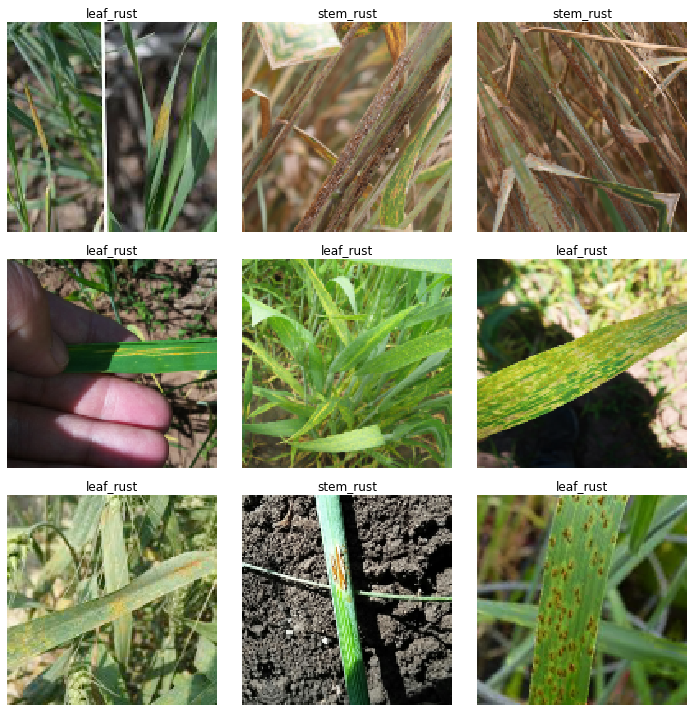

In [0]:
clean_data_small.show_batch(rows=3, figsize=(10,10))

# Model training (Stage 1 Progressive resizing)

In [0]:
learn = cnn_learner(clean_data_small, models.resnet34, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.data

ImageDataBunch;

Train: LabelList (758 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat
Path: /content/drive/My Drive/C1_CD2;

Valid: LabelList (84 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
leaf_rust,healthy_wheat,stem_rust,leaf_rust,leaf_rust
Path: /content/drive/My Drive/C1_CD2;

Test: None

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.63E-03
Min loss divided by 10: 5.75E-03


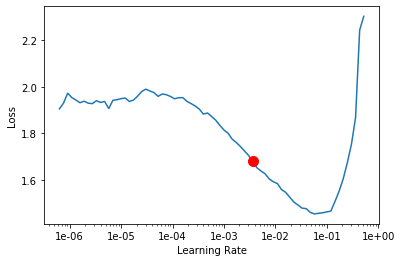

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
lr=learn.recorder.min_grad_lr;lr

0.00363078054770101

In [0]:
learn.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.587890,1.123209,0.297619,0.702381,02:03
1,1.271942,0.695822,0.226190,0.773810,01:56


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 3.98E-03


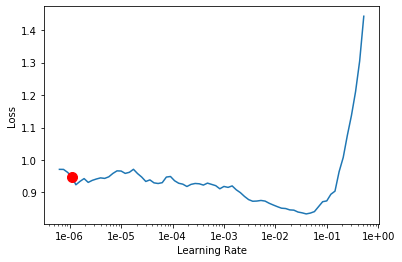

In [0]:
# learn.fit_one_cycle(1, 1e-3)
# learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [0]:
lr=learn.recorder.min_grad_lr;lr

1.096478196143185e-06

In [0]:
learn.save("resnet34_model_size128_stage1", return_path=True)
# learn.export()

PosixPath('/content/drive/My Drive/C1_CD2/models/resnet34_model_size128_stage1.pth')

In [0]:
learn.data = clean_data_large
learn.data.valid_dl = data.valid_dl

In [0]:
learn.data

ImageDataBunch;

Train: LabelList (842 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat
Path: /content/drive/My Drive/C1_CD2;

Valid: LabelList (608 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,leaf_rust
Path: /content/drive/My Drive/C1_CD2;

Test: None

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-04
Min loss divided by 10: 1.00E-04


0.0001584893192461114

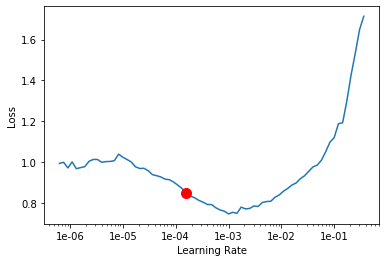

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
lr=learn.recorder.min_grad_lr;lr

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(4,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.858669,0.961265,0.276316,0.723684,04:45
1,0.689309,1.070531,0.240132,0.759868,03:58
2,0.553642,1.326895,0.207237,0.792763,03:54
3,0.444696,1.331576,0.213816,0.786184,03:54


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.32E-07


9.120108393559096e-07

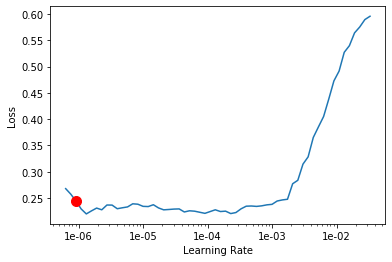

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
lr=learn.recorder.min_grad_lr;lr

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.222163,1.262455,0.208882,0.791118,03:52
1,0.232094,1.236121,0.205592,0.794408,03:56


In [0]:
learn.unfreeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.332435,1.772494,0.226974,0.773026,03:56
1,0.414037,1.355046,0.190789,0.809211,03:54
2,0.381892,0.960882,0.171053,0.828947,03:52


In [0]:
# learn.export()
learn.save('resnet34-size256',return_path=True)

PosixPath('/content/drive/My Drive/C1_CD2/models/resnet34-size256.pth')

# Model training (stage 2: retraining on top_loss samples)

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn,n_imgs=120)

In [0]:
top_loss_df=train_df.iloc[idxs]
top_loss_df['label'].value_counts()

stem_rust        55
leaf_rust        55
healthy_wheat    10
Name: label, dtype: int64

In [0]:
train_df_aug=pd.DataFrame()
train_df_aug=train_df.append(top_loss_df)
train_df_aug=train_df_aug.append(top_loss_df)

In [0]:
clean_data_aug = (ImageDataBunch.from_df(path, train_df_aug,
                                     valid_pct=0,
                                     ds_tfms=tfms,
                                     size=256)
              .normalize(imagenet_stats))

In [0]:
learn = cnn_learner(clean_data_aug, models.resnet34, metrics=[error_rate, accuracy]).load('resnet34-size256')
learn.data.valid_dl = data.valid_dl
learn.fit_one_cycle(2)
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.369596,1.164224,0.223684,0.776316,04:39
1,0.296200,0.946912,0.179276,0.820724,04:36


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 2.29E-05


1.096478196143185e-06

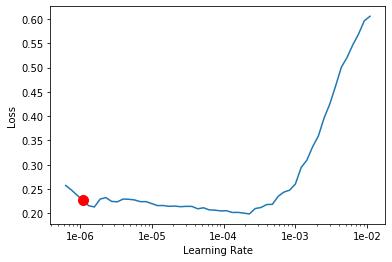

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
lr=learn.recorder.min_grad_lr;lr

In [0]:
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.235242,0.930422,0.180921,0.819079,04:36
1,0.226231,0.921016,0.180921,0.819079,04:39
2,0.215930,0.926642,0.182566,0.817434,04:38


In [0]:
learn.save('resnet34-clean_resize128-256-retrain',return_path=True)

PosixPath('/content/drive/My Drive/C1_CD2/models/resnet34-clean_resize128-256-retrain.pth')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 9.12E-06


2.2908676527677735e-06

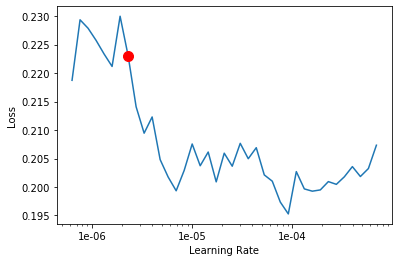

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
lr=learn.recorder.min_grad_lr;lr

In [0]:
learn.fit_one_cycle(4, max_lr=slice(2e-6,3e-6))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.205267,0.939717,0.189145,0.810855,04:40
1,0.211288,0.926499,0.182566,0.817434,04:38
2,0.200271,0.963786,0.187500,0.812500,04:38
3,0.187450,0.945202,0.187500,0.812500,04:40


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.200997,1.197056,0.222039,0.777961,04:40
1,0.300893,1.807910,0.284539,0.715461,04:41
2,0.304176,0.805881,0.172697,0.827303,04:40
3,0.255525,0.886300,0.189145,0.810855,04:42


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.20E-04


6.309573444801933e-07

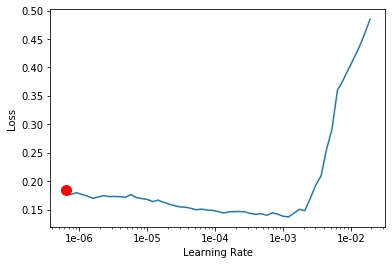

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
lr=learn.recorder.min_grad_lr;lr

In [0]:
learn.fit_one_cycle(4,lr)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.141985,0.870889,0.194079,0.805921,04:40
1,0.155346,0.867745,0.192434,0.807566,04:39
2,0.160349,0.843439,0.190789,0.809211,04:43
3,0.158375,0.902586,0.194079,0.805921,04:41


In [0]:
learn.save('resnet34-clean_resize128-256-retrain2',return_path=True)

PosixPath('/content/drive/My Drive/C1_CD2/models/resnet34-clean_resize128-256-retrain3.pth')

In [0]:
# learn.export()
# learn = load_learner('/content/drive/My Drive/C1_CD', test=ImageList.from_folder('/content/drive/My Drive/C1_CD/test'))

In [0]:
learn.data.test_dl = data.test_dl

In [0]:
learn.data

ImageDataBunch;

Train: LabelList (1082 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat,healthy_wheat
Path: /content/drive/My Drive/C1_CD2;

Valid: LabelList (608 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
leaf_rust,leaf_rust,leaf_rust,leaf_rust,leaf_rust
Path: /content/drive/My Drive/C1_CD2;

Test: LabelList (610 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/C1_CD2

In [0]:
preds_test,y_res= learn.get_preds(DatasetType.Test)

In [0]:
preds_test.size()

torch.Size([610, 3])

In [0]:
sample = pd.read_csv('/content/drive/My Drive/C1_CD2/sample_submission.csv')

In [0]:
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('/content/drive/My Drive/C1_CD2/test') ]})
for i, c in enumerate(learn.data.classes):
    submission[c] = preds_test[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,HHFCSR,0.999932,0.000052,0.000016
1,1WP5MJ,0.003537,0.010944,0.985519
2,513FKC,0.000957,0.993201,0.005842
3,NS8DVC,0.973434,0.010399,0.016167
4,2G71YU,0.999902,0.000056,0.000042


In [0]:
submission = submission.set_index('ID')
submission = submission.reindex(index=sample['ID'])
submission = submission.reset_index()
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,643083,0.714267,0.208433,0.077300
1,008FWT,0.058921,0.922357,0.018723
2,00AQXY,0.238238,0.756761,0.005000
3,01OJZX,0.058921,0.922357,0.018723
4,07OXKK,0.003259,0.000033,0.996708


In [0]:
submission.to_csv(path+'resnet34-clean_resize128-256-retrain3.csv', index = False)